로직 개발을 위한  Jupyter File

In [66]:
import win32com.client
import pythoncom
import pandas as pd 
import numpy as np
import time
from datetime import datetime, date
import schedule
import re
import ta
import pyperclip
import pyautogui
import pywinauto

#----------------------------------------------------------
#로그인 코드
#----------------------------------------------------------
class XASessionEventHandler:
    login_state=0

    def OnLogin(selfself, code, msg):
        if code =="0000":
            print("로그인 성공")
            XASessionEventHandler.login_state= 1
        else:
            print("로그인 실패")

class XAQueryEventHandlerO3106:
    query_state =0

    def OnReceiveData(self, code):
        XAQueryEventHandlerO3106.query_state = 1

id='lshblue3'
pw='godhfma1'
cert_pw='soheeya132@'

instXASession = win32com.client.DispatchWithEvents("XA_Session.XASession", XASessionEventHandler)
instXASession.ConnectServer("hts.ebestsec.co.kr", 20001)
instXASession.Login(id, pw, cert_pw, 0, 0)

while XASessionEventHandler.login_state==0:
    pythoncom.PumpWaitingMessages()

#계좌정보 호출 코드
num_account = instXASession.GetAccountListCount()

for i in range(num_account):
    account = instXASession.GetAccountList(i)
    print(account)

로그인 성공
20507704502


In [67]:
#----------------------------------------------------------
#<나스닥>
#Tick Data Call
#----------------------------------------------------------

market=["NQM22"]

class TickData:
    def __init__(self, gubun, market, number, gunsu):
        self.first=gubun
        self.second=market
        self.third=number
        self.forth=gunsu
        
    def tick_data(self):
        pythoncom.CoInitialize()
        class XAQueryEventHandlerO3139:
            query_state =0

            def OnReceiveData(self, code):
                    XAQueryEventHandlerO3139.query_state = 1

        instXAQueryO3139=win32com.client.DispatchWithEvents("XA_DataSet.XAQuery", XAQueryEventHandlerO3139)
        instXAQueryO3139.ResFileName="C:\\eBEST\\xingAPI\\Res\\o3139.res"
        instXAQueryO3139.SetFieldData("o3139InBlock", "mktgb", 0, self.first)
        instXAQueryO3139.SetFieldData("o3139InBlock", "shcode", 0, self.second)
        instXAQueryO3139.SetFieldData("o3139InBlock", "ncnt", 0, self.third)
        instXAQueryO3139.SetFieldData("o3139InBlock", "qrycnt", 0, self.forth)
        instXAQueryO3139.Request(0)
        while XAQueryEventHandlerO3139.query_state == 0:
            pythoncom.PumpWaitingMessages() 

        count=instXAQueryO3139.GetBlockCount("o3139OutBlock1")

        min_empty=[]
        tickprice=[]

        for i in range(count):
            date=instXAQueryO3139.GetFieldData("o3139OutBlock1", "date", i)
            min_empty.append(date)
            time=instXAQueryO3139.GetFieldData("o3139OutBlock1", "time", i)
            min_empty.append(time)
            o=instXAQueryO3139.GetFieldData("o3139OutBlock1", "open", i)
            min_empty.append(o)
            h=instXAQueryO3139.GetFieldData("o3139OutBlock1", "high", i)
            min_empty.append(h)
            l=instXAQueryO3139.GetFieldData("o3139OutBlock1", "low", i)
            min_empty.append(l)
            c=instXAQueryO3139.GetFieldData("o3139OutBlock1", "close", i)
            min_empty.append(c)
            v=instXAQueryO3139.GetFieldData("o3139OutBlock1", "volume", i)
            min_empty.append(v)

        pythoncom.CoUninitialize()
        
        for j in range(101):
            min_empty[(7*j-7):(7*(j+1)-7)]
            tickprice.append(min_empty[(7*j-7):(7*(j+1)-7)])

        tickprice=tickprice[1:]
        tickprice=pd.DataFrame(tickprice)
        t=tickprice.rename(columns={0:'Date', 1:'Time', 2:'Open', 3:'High', 4:'Low', 5:'Close', 6:'Volume'})
        t['Time']=t['Date']+t['Time']
        t['Time']=t['Time'].astype('str')
        t['Time']=pd.to_datetime(t['Time'])
        t=t.drop(columns=['Date'])
        t.index=t['Time']
        globals()['t{}'.format(self.third)]=t.drop(columns='Time')
        globals()['t{}'.format(self.third)]=globals()['t{}'.format(self.third)].sort_index(ascending=True)
        globals()['t{}'.format(self.third)].astype(float)
        print('Tick end')
        
t_60=TickData("F", market[0], 60, 100)
t_600=TickData("F", market[0], 600, 100)

t_60.tick_data()
t_600.tick_data()

Tick end
Tick end


In [68]:
#----------------------------------------------------------
#각 분봉 호출코드 (필요 분봉: 1, 3, 5, 30, 60, 90, 20, 150, 240, 360, 480, 960)
#----------------------------------------------------------
class MinuteData:
    def __init__(self, market, minute, number):
        self.first=market
        self.second=minute
        self.third=number
        
    def set_data(self):
        pythoncom.CoInitialize()
        class XAQueryEventHandlerO3103:
            query_state =0

            def OnReceiveData(self, code):
                    XAQueryEventHandlerO3103.query_state = 1

        instXAQueryO3103=win32com.client.DispatchWithEvents("XA_DataSet.XAQuery", XAQueryEventHandlerO3103)
        instXAQueryO3103.ResFileName="C:\\eBEST\\xingAPI\\Res\\o3103.res"
        instXAQueryO3103.SetFieldData("o3103InBlock", "shcode", 0, self.first)
        instXAQueryO3103.SetFieldData("o3103InBlock", "ncnt", 0, self.second)
        instXAQueryO3103.SetFieldData("o3103InBlock", "readcnt", 0, self.third)
        instXAQueryO3103.Request(0)
        while XAQueryEventHandlerO3103.query_state == 0:
            pythoncom.PumpWaitingMessages() 

        count=instXAQueryO3103.GetBlockCount("o3103OutBlock1")

        min_empty=[]
        minprice=[]

        for i in range(count):
            date=instXAQueryO3103.GetFieldData("o3103OutBlock1", "date", i)
            min_empty.append(date)
            time=instXAQueryO3103.GetFieldData("o3103OutBlock1", "time", i)
            min_empty.append(time)
            o=instXAQueryO3103.GetFieldData("o3103OutBlock1", "open", i)
            min_empty.append(o)
            h=instXAQueryO3103.GetFieldData("o3103OutBlock1", "high", i)
            min_empty.append(h)
            l=instXAQueryO3103.GetFieldData("o3103OutBlock1", "low", i)
            min_empty.append(l)
            c=instXAQueryO3103.GetFieldData("o3103OutBlock1", "close", i)
            min_empty.append(c)

        pythoncom.CoUninitialize()
        
        for j in range(101):
            min_empty[(6*j-6):(6*(j+1)-6)]
            minprice.append(min_empty[(6*j-6):(6*(j+1)-6)])

        minprice=minprice[1:]
        min=pd.DataFrame(minprice)
        min=min.rename(columns={0:'Date', 1:'Time', 2:'Open', 3:'High', 4:'Low', 5:'Close'})
        min=min.sort_index(ascending=False)
        min['Time']=min['Date']+min['Time']
        min['Time']=min['Time'].astype('str')
        min['Time']=pd.to_datetime(min['Time'])
        min=min.drop(columns=['Date'])
        min.index=min['Time']
        globals()['mt{}'.format(self.second)]=min.drop(columns='Time')
        print("min end")
        import time
        time.sleep(1)

min1=MinuteData(market[0], 1, 20)
min3=MinuteData(market[0], 3, 20)
min5=MinuteData(market[0], 5, 20)
min1.set_data()  #1분에 한번씩 호출
min3.set_data()
min5.set_data()

min end
min end
min end


In [69]:
#밴드차트
upperline=t600['High'].rolling(window=10).max()
lowerline=t600['Low'].rolling(window=10).min()
midline=(upperline+lowerline)/2

# upperline60=t60['High'].rolling(window=9).max()
# lowerline60=t60['Low'].rolling(window=9).min()
# midline60=(upperline60+lowerline60)/2

#추세판별함수 
#당시의 틱이 상승내지 하락이며 이전에 두번의 상승 및 하락이 추가로 진행되어야 함.
def trendcon(upperline, lowerline):
    trendstates=0
    trconup=[]
    trcondn=[]
    #상승추세
    for i in range(10):    
        if upperline[-i]>upperline[-(i+1)]:
            trconup.append(1)
    for i in range(10):    
        if lowerline[-i]<lowerline[-(i+1)]:
            trcondn.append(1)
    sumup=sum(trconup)    
    print("상승추세 스텍 : ", sumup)
    sumdn=sum(trcondn)
    print("하락추세 스텍 : ", sumdn)
    if sumup>=3 :
        trendstates=1
    elif sumdn>=3 :
        trendstates=-1
    return trendstates
print("---------------960틱 대추세----------------")       
trendstates=trendcon(upperline, lowerline)
if trendstates>=1:
    trend_states=trendstates
elif trendstates<=-1:
    trend_states=trendstates


mul=[0.3, 0.2]   
tick_kind=[600]

#중심선 라인을 기준으로 위로 돌파 해 있는지 여부를 확인 (매도진입조건)
midcrossup=midline<t600["High"].astype(float)

#중심선 라인을 기준으로 아래로 빠져있는지의 여부를 확인(매수진입조건)
midcrssdn=midline>t600["Low"].astype(float)

#볼린저밴드 조건 제작
for j in tick_kind:    
    for k in [mul[0]]:                 
        globals()['t{}_{}_upper20'.format(j, int(k))]=globals()["t{}".format(j)]['Close'].rolling(window=20).mean()+k*globals()["t{}".format(j)]['Close'].rolling(window=20).std()                                        
        globals()['t{}_{}_lower20'.format(j, int(k))]=globals()["t{}".format(j)]['Close'].rolling(window=20).mean()-k*globals()["t{}".format(j)]['Close'].rolling(window=20).std()

for j in tick_kind:    
    for k in [mul[1]]:                   
        globals()['t{}_{}_upper60'.format(j, int(k))]=globals()["t{}".format(j)]['Close'].rolling(window=50).mean()+k*globals()["t{}".format(j)]['Close'].rolling(window=50).std()                                        
        globals()['t{}_{}_lower60'.format(j, int(k))]=globals()["t{}".format(j)]['Close'].rolling(window=50).mean()-k*globals()["t{}".format(j)]['Close'].rolling(window=50).std()

---------------960틱 대추세----------------
상승추세 스텍 :  0
하락추세 스텍 :  1


In [70]:
t600_0_upper20, t600_0_lower20, t600_0_upper60, t600_0_lower60

(Time
 2022-05-31 14:51:07             NaN
 2022-05-31 14:51:48             NaN
 2022-05-31 14:52:22             NaN
 2022-05-31 14:53:04             NaN
 2022-05-31 14:53:40             NaN
                            ...     
 2022-06-01 01:16:01    12663.725963
 2022-06-01 01:23:14    12662.065940
 2022-06-01 01:29:30    12660.092055
 2022-06-01 01:38:26    12657.762696
 2022-06-01 01:43:16    12657.737809
 Name: Close, Length: 100, dtype: float64,
 Time
 2022-05-31 14:51:07             NaN
 2022-05-31 14:51:48             NaN
 2022-05-31 14:52:22             NaN
 2022-05-31 14:53:04             NaN
 2022-05-31 14:53:40             NaN
                            ...     
 2022-06-01 01:16:01    12652.099037
 2022-06-01 01:23:14    12650.809060
 2022-06-01 01:29:30    12649.107945
 2022-06-01 01:38:26    12647.262304
 2022-06-01 01:43:16    12647.237191
 Name: Close, Length: 100, dtype: float64,
 Time
 2022-05-31 14:51:07             NaN
 2022-05-31 14:51:48             NaN
 2022-05

In [71]:
(t600_0_lower20[-1]<=float(t600["High"][-1])<=t600_0_upper20[-1]) or (t600_0_lower60[-1]<=float(t600["High"][-1])<=t600_0_upper60[-1])

True

In [72]:
t600_0_lower20

Time
2022-05-31 14:51:07             NaN
2022-05-31 14:51:48             NaN
2022-05-31 14:52:22             NaN
2022-05-31 14:53:04             NaN
2022-05-31 14:53:40             NaN
                           ...     
2022-06-01 01:16:01    12652.099037
2022-06-01 01:23:14    12650.809060
2022-06-01 01:29:30    12649.107945
2022-06-01 01:38:26    12647.262304
2022-06-01 01:43:16    12647.237191
Name: Close, Length: 100, dtype: float64

In [73]:
#볼린저밴드 제작

ma=[12, 20]
mul=[0.2, 1.8]

    #5분봉, 3분봉, 1분봉 볼벤 세팅
m5_mean=mt5['Close'].rolling(window=20).mean()
m3_mean=mt3['Close'].rolling(window=20).mean()
m1_mean=mt1['Close'].rolling(window=20).mean()
for k in mul:         
    globals()['mt5_{}_upper'.format(int(k))]=m5_mean+k*mt5['Close'].rolling(window=20).std()                                        
    globals()['mt5_{}_lower'.format(int(k))]=m5_mean-k*mt5['Close'].rolling(window=20).std()              
    globals()['mt3_{}_upper'.format(int(k))]=m3_mean+k*mt3['Close'].rolling(window=20).std()                                        
    globals()['mt3_{}_lower'.format(int(k))]=m3_mean-k*mt3['Close'].rolling(window=20).std()                    
    globals()['mt1_{}_upper'.format(int(k))]=m1_mean+k*mt1['Close'].rolling(window=20).std()                    
    globals()['mt1_{}_lower'.format(int(k))]=m1_mean-k*mt1['Close'].rolling(window=20).std()   

In [74]:
# #볼린저밴드 가격 업데이트
# min_kind=[1, 3, 5]

# for i in min_kind:
#     if float(t600['Close'][-1]) >= float(globals()['mt{}'.format(i)].iloc[-1]["High"]):
#         globals()['mt{}'.format(i)].iloc[-1]["High"]=t600['Close'][-1]
#         globals()['mt{}'.format(i)].iloc[-1]["Close"]=t600['Close'][-1]
#     elif float(t600['Close'][-1]) <= float(globals()['mt{}'.format(i)].iloc[-1]["Low"]): 
#         globals()['mt{}'.format(i)].iloc[-1]["Low"]=t600['Close'][-1]
#         globals()['mt{}'.format(i)].iloc[-1]["Close"]=t600['Close'][-1]
#     else:
#         globals()['mt{}'.format(i)].iloc[-1]["Close"]=t600['Close'][-1]  

In [75]:
#600 CCI, period > 9, 20

cci600=ta.trend.cci(low=t600["Low"].astype(float), high=t600["High"].astype(float), close=t600["Close"].astype(float), window=5, constant=0.015).dropna(axis=False)
cci600_p=ta.trend.cci(low=t600["Low"].astype(float), high=t600["High"].astype(float), close=t600["Close"].astype(float), window=20, constant=0.015).dropna(axis=False)
cci60=ta.trend.cci(low=t60["Low"].astype(float), high=t60["High"].astype(float), close=t60["Close"].astype(float), window=20, constant=0.015).dropna(axis=False)

In [76]:

#매수진입조건 함수

#600 CCI, period > 9, 20

cci600=ta.trend.cci(low=t600["Low"].astype(float), high=t600["High"].astype(float), close=t600["Close"].astype(float), window=9, constant=0.015).dropna(axis=False)
cci600_p=ta.trend.cci(low=t600["Low"].astype(float), high=t600["High"].astype(float), close=t600["Close"].astype(float), window=20, constant=0.015).dropna(axis=False)
cci60=ta.trend.cci(low=t60["Low"].astype(float), high=t60["High"].astype(float), close=t60["Close"].astype(float), window=9, constant=0.015).dropna(axis=False)

def buycondition(cci600):
    buyconlist=[]
    for i in min_kind:
        #볼린저밴드 하단 닫혔을 때 조건
        globals()["buybb_btw{}".format(i)]=float(globals()["mt{}".format(i)].iloc[-1]['Low']) <= round(globals()["mt{}_1_lower".format(i)][-1], 2)
        globals()["buybb_1n2cndl{}".format(i)]=round(globals()["mt{}_1_lower".format(i)][-1], 2) >= round(globals()["mt{}_1_lower".format(i)][-2], 2)
        globals()["buybb_2n3cndl{}".format(i)]=round(globals()["mt{}_1_lower".format(i)][-2], 2) >= round(globals()["mt{}_1_lower".format(i)][-3], 2)

        #볼린저밴드 상단 열렸을 때 중심선 조건
        globals()["buyma_btw{}".format(i)]=round(globals()["mt{}_0_lower".format(i)][-1], 2) <= float(globals()["mt{}".format(i)].iloc[-1]['Low']) <= round(globals()["mt{}_0_upper".format(i)][-1], 2)
        globals()["buybb_upcon{}".format(i)]=any((round(globals()["mt{}_1_upper".format(i)][-15:],2) <= globals()["mt{}".format(i)]['High'][-15:].astype(float)))

        #600틱 CCI 조건
        ccidnover=cci600<=-20
        ccidn_over=any(ccidnover[-3:]==True)

        #조건취합
        buy_con=((globals()["buybb_btw{}".format(i)] and (globals()["buybb_1n2cndl{}".format(i)] or globals()["buybb_2n3cndl{}".format(i)])) or \
            (globals()["buybb_upcon{}".format(i)] and globals()["buyma_btw{}".format(i)])) and ccidn_over
        
        buyconlist.append(buy_con)
    print(buyconlist)

    buy=any(buyconlist)

    return buy

buycondition(cci600)



NameError: name 'min_kind' is not defined

In [ ]:
#매도조건함수

def sellcondition(cci600):
    sellconlist=[]
    for i in min_kind:
        
        #볼린저밴드 상단 닫혔을 때 조건
        globals()["sellbb_btw{}".format(i)]=float(globals()["mt{}".format(i)].iloc[-1]['High']) >= round(globals()["mt{}_1_upper".format(i)][-1], 2)
        globals()["sellbb_1n2cndl{}".format(i)]=round(globals()["mt{}_1_upper".format(i)][-1], 2) <= round(globals()["mt{}_1_upper".format(i)][-2], 2)
        globals()["sellbb_2n3cndl{}".format(i)]=round(globals()["mt{}_1_upper".format(i)][-2], 2) <= round(globals()["mt{}_1_upper".format(i)][-3], 2)

        #볼린저밴드 하단이 열릴 때 조건
        globals()["sellma_btw{}".format(i)]=round(globals()["mt{}_0_lower".format(i)][-1], 2) <= float(globals()["mt{}".format(i)].iloc[-1]['High']) <= round(globals()["mt{}_0_upper".format(i)][-1], 2)
        globals()["sellbb_lwcon{}".format(i)]=any((round(globals()["mt{}_1_lower".format(i)][-15:],2) >= globals()["mt{}".format(i)]['Low'][-15:].astype(float)))

        #600틱 CCI 조건
        cciupover=cci600>=20
        cciup_over=any(cciupover[-3:]==True)

        #조건취합
        sell_con= (globals()["sellbb_btw{}".format(i)] and (globals()["sellbb_1n2cndl{}".format(i)] or globals()["sellbb_2n3cndl{}".format(i)]) or \
            (globals()["sellma_btw{}".format(i)] and globals()["sellbb_lwcon{}".format(i)])) and \
                cciup_over
        
        sellconlist.append(sell_con)

    print(sellconlist)
    sell=any(sellconlist)
    
    return sell

sellcondition(cci600)



NameError: name 'min_kind' is not defined

In [ ]:
cci600_p[-20:]

Time
2022-05-24 02:53:05    -64.939355
2022-05-24 02:56:55      7.413188
2022-05-24 03:01:00     87.772062
2022-05-24 03:03:37    108.139992
2022-05-24 03:07:52     55.897778
2022-05-24 03:11:50    112.604432
2022-05-24 03:15:57    100.247525
2022-05-24 03:21:11     34.002725
2022-05-24 03:25:03     67.283997
2022-05-24 03:31:50     83.556005
2022-05-24 03:38:28     78.025664
2022-05-24 03:45:42     55.326932
2022-05-24 03:51:24     37.077156
2022-05-24 03:53:03    -59.085167
2022-05-24 03:56:46    -56.735347
2022-05-24 04:01:41    -35.010712
2022-05-24 04:10:27    -30.093708
2022-05-24 04:17:41    -20.731791
2022-05-24 04:27:10     20.981227
2022-05-24 04:34:33     31.266585
Name: cci, dtype: float64

In [ ]:
#매수컷

((any((cci60>100)[-3:]==True) and (cci60[-1]<100)) and any((cci600>100)[-3:]==True) and cci600[-2]>cci600[-1])

#매도컷

((any((cci60<-100)[-3:]==True) and (cci60[-1]>-100)) and any((cci600<-100)[-3:]==True) and cci600[-2]<cci600[-1])



False

In [ ]:
list(range(1,4))

[1, 2, 3]

In [ ]:
(t600_0_lower20[-2]<=float(t600["Low"][-2])<=t600_0_upper20[-2])==True

True

In [ ]:
any([(((t600_0_lower20[-i]<=float(t600["Low"][-i])<=t600_0_upper20[-i])==True) or ((t600_0_lower60[-i]<=float(t600["Low"][-i])<=t600_0_upper60[-i]))==True) for i in range(2,4)])

True

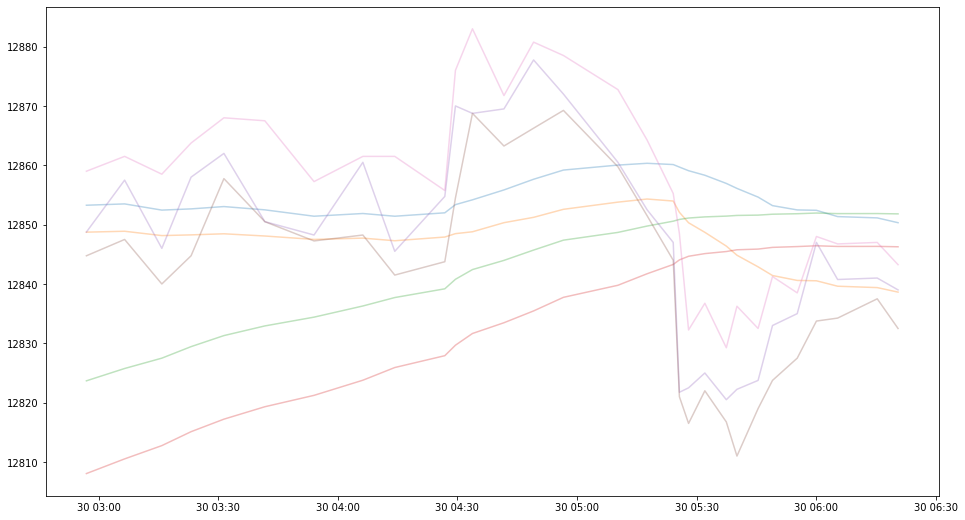

: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(t600_0_upper20[-30:], label='Nas', alpha=0.3)
plt.plot(t600_0_lower20[-30:], label='Nas', alpha=0.3)
plt.plot(t600_0_upper60[-30:], label='Nas', alpha=0.3)
plt.plot(t600_0_lower60[-30:], label='Nas', alpha=0.3)
plt.plot(t600["Close"][-30:].astype(float), label='Nas', alpha=0.3)
plt.plot(t600["Low"][-30:].astype(float), label='Nas', alpha=0.3)
plt.plot(t600["High"][-30:].astype(float), label='Nas', alpha=0.3)




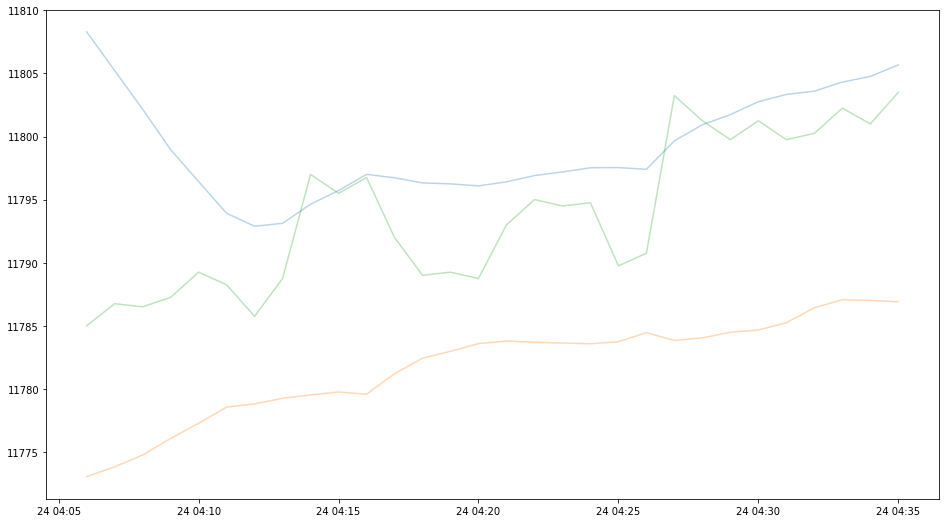

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(mt1_1_upper[-30:], label='Nas', alpha=0.3)
plt.plot(mt1_1_lower[-30:], label='Nas', alpha=0.3)
plt.plot(mt1["Close"][-30:].astype(float), label='Nas', alpha=0.3)

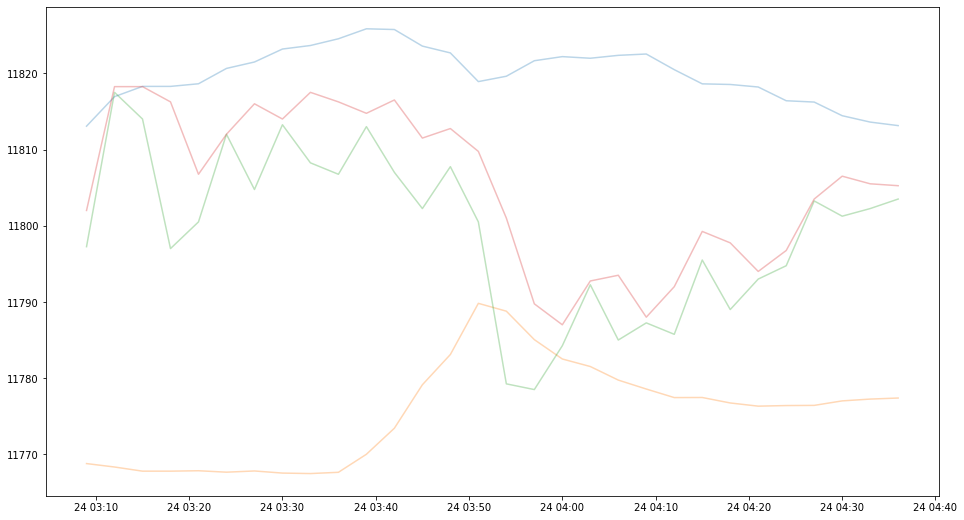

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(mt3_1_upper[-30:], label='Nas', alpha=0.3)
plt.plot(mt3_1_lower[-30:], label='Nas', alpha=0.3)
plt.plot(mt3["Close"][-30:].astype(float), label='Nas', alpha=0.3)
plt.plot(mt3["High"][-30:].astype(float), label='Nas', alpha=0.3)

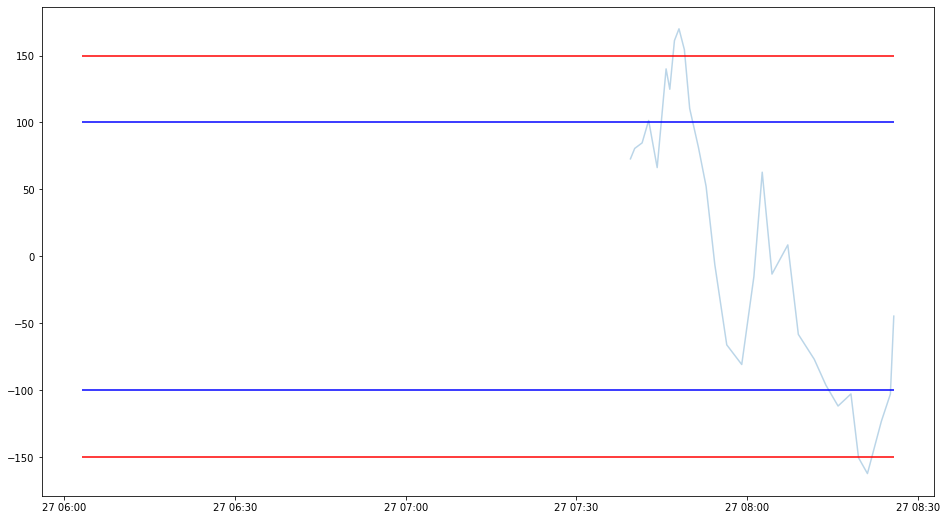

: 

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(cci600[-30:], label='Nas', alpha=0.3)
plt.hlines(150, cci600[-70:].index[0] , cci600[-30:].index[-1] , color="red")
plt.hlines(100, cci600[-70:].index[0] , cci600[-30:].index[-1] , color="blue")
plt.hlines(-150, cci600[-70:].index[0] , cci600[-30:].index[-1] ,color="red")
plt.hlines(-100, cci600[-70:].index[0] , cci600[-30:].index[-1] ,color="blue")

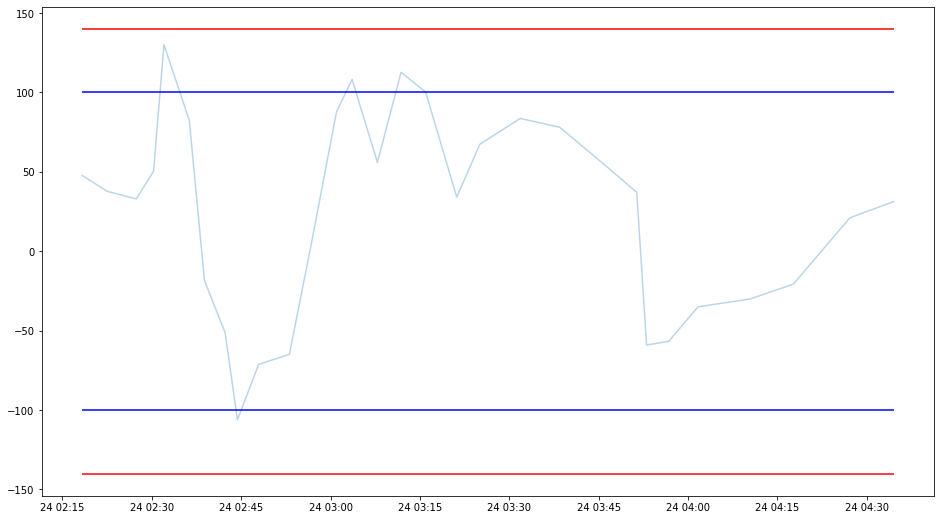

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(cci600_p[-30:], label='Nas', alpha=0.3)
plt.hlines(140, cci600_p[-30:].index[0] , cci600_p[-30:].index[-1] , color="red")
plt.hlines(20, cci600_p[-30:].index[0] , cci600_p[-30:].index[-1] , color="blue")
plt.hlines(-140, cci600_p[-30:].index[0] , cci600_p[-30:].index[-1] ,color="red")
plt.hlines(-20, cci600_p[-30:].index[0] , cci600[-30:].index[-1] ,color="blue")

In [ ]:
#밴드차트 (20, 600)

upperline=t600['High'].rolling(window=10).max()
lowerline=t600['Low'].rolling(window=10).min()
midline=(upperline+lowerline)/2

upperline60=t60['High'].rolling(window=10).max()
lowerline60=t60['Low'].rolling(window=10).min()
midline60=(upperline60+lowerline60)/2

In [ ]:
#600 CCI, 20 CCI

cci600=ta.trend.cci(low=t600["Low"].astype(float), high=t600["High"].astype(float), close=t600["Close"].astype(float), window=9, constant=0.015).dropna(axis=False)
cci60=ta.trend.cci(low=t60["Low"].astype(float), high=t60["High"].astype(float), close=t60["Close"].astype(float), window=9, constant=0.015).dropna(axis=False)

In [ ]:
#진입 조건 함수 (필요항목 : 20틱 상하단, 20틱 중심, 20틱 cci, 600틱, 600틱 CCI)

#매도 진입조건
def sellentercon(midline, midline20, cci60, t600, t60, upperline20, lowerline20):
    #중심선 라인을 기준으로 위로 돌파 해 있는지 여부를 확인(매도 & 매수청산)
    midcrossup=midline<t600["High"].astype(float)
    
    #600틱 조건
    cciupover=cci600>=20
    cciup_over=any(cciupover[-3:]==True)

    #20틱 구간 설정
    lowermax20=lowerline20.rolling(window=40).max()

    sellzone=pd.DataFrame([-5<=(lowermax20[i]-upperline20[i])<=10 for i in range(len(t60["High"]))]).set_index(t60["High"].index)
   
    #20틱 진입조건
    sellenter=(midline20<=t60["High"].astype(float)) 
    sellccicon=cci60.astype(float)[-20:]>=20   
    
    #조건 취합 
    sell_con=any(midcrossup[-2:]==True) and \
        cciup_over and sellzone[-2] and \
            sellenter[-2] and \
                sellccicon[-2]

    return sell_con

#매수 진입조건
def buyentercon(midline, midline20, cci60, t600, t60, upperline20, lowerline20):
    #중심선 라인을 기준으로 아래로 빠져있는지의 여부를 확인(매수 & 매도청산)
    midcrssdn=midline>t600["Low"].astype(float)
    
    #600틱 조건
    ccidnover=cci600<=-20
    ccidn_over=any(ccidnover[-3:]==True)

    #20틱 구간설정
    uppermin20=upperline20.rolling(window=40).min()
    buyzone=pd.DataFrame([-10<=(uppermin20[i]-lowerline20[i])<=5 for i in range(len(t60["Low"]))]).set_index(t60["Low"].index)

    #20틱 진입조건

    buyenter=(midline20>=t60["Low"].astype(float)) 
    buyccicon=cci60.astype(float)[-20:]<=-20    

    #조건 취합
    buy_con=any(midcrssdn[-2:]==True) and \
        ccidn_over and buyzone[-2] and \
            buyenter[-2] and \
                buyccicon[-2]

    return buy_con

In [ ]:
# sellcon(midline, midline20, cci60, t600, t60, upperline20, lowerline20)

제작함수목록

1. 추세판별함수
2. 조건 함수

In [ ]:
t60["Close"][-60:]

Time
2022-06-01 01:02:18    12629.00
2022-06-01 01:02:32    12635.25
2022-06-01 01:03:01    12634.00
2022-06-01 01:03:27    12629.50
2022-06-01 01:04:00    12626.50
2022-06-01 01:04:40    12631.75
2022-06-01 01:05:12    12637.50
2022-06-01 01:05:23    12639.50
2022-06-01 01:05:40    12643.00
2022-06-01 01:06:03    12644.50
2022-06-01 01:06:23    12649.00
2022-06-01 01:06:55    12646.25
2022-06-01 01:07:54    12647.50
2022-06-01 01:08:33    12644.25
2022-06-01 01:08:41    12651.25
2022-06-01 01:09:11    12646.50
2022-06-01 01:09:59    12650.25
2022-06-01 01:10:43    12648.00
2022-06-01 01:11:15    12650.25
2022-06-01 01:11:58    12650.00
2022-06-01 01:12:52    12653.50
2022-06-01 01:13:13    12654.25
2022-06-01 01:14:06    12656.50
2022-06-01 01:14:45    12651.00
2022-06-01 01:15:17    12645.75
2022-06-01 01:16:01    12648.75
2022-06-01 01:17:00    12648.75
2022-06-01 01:17:31    12643.50
2022-06-01 01:17:52    12646.50
2022-06-01 01:18:29    12647.00
2022-06-01 01:19:16    12645.00
202

In [ ]:
lowerline[-40:-20]

Time
2022-05-31 19:01:38    12656.25
2022-05-31 19:10:55    12656.25
2022-05-31 19:26:02    12656.25
2022-05-31 19:38:33    12663.25
2022-05-31 19:56:47    12675.00
2022-05-31 20:06:38    12680.00
2022-05-31 20:14:03    12683.50
2022-05-31 20:28:23    12683.75
2022-05-31 20:38:01    12692.75
2022-05-31 20:51:35    12692.75
2022-05-31 21:08:08    12692.75
2022-05-31 21:27:34    12692.75
2022-05-31 21:51:06    12692.75
2022-05-31 21:56:20    12678.00
2022-05-31 22:03:15    12667.25
2022-05-31 22:11:23    12664.25
2022-05-31 22:24:48    12662.00
2022-05-31 22:45:18    12662.00
2022-05-31 23:06:37    12662.00
2022-05-31 23:11:03    12646.50
Name: Low, dtype: float64

In [ ]:
midline[-20:]

Time
2022-05-31 23:25:25    12678.250
2022-05-31 23:39:41    12676.125
2022-05-31 23:55:41    12673.000
2022-06-01 00:02:17    12667.375
2022-06-01 00:08:21    12671.125
2022-06-01 00:17:42    12671.125
2022-06-01 00:24:24    12671.125
2022-06-01 00:30:59    12671.125
2022-06-01 00:33:36    12664.625
2022-06-01 00:38:24    12663.125
2022-06-01 00:46:49    12663.125
2022-06-01 00:50:34    12656.000
2022-06-01 00:59:49    12656.000
2022-06-01 01:04:40    12656.000
2022-06-01 01:09:11    12652.875
2022-06-01 01:16:01    12647.750
2022-06-01 01:23:14    12642.375
2022-06-01 01:29:30    12637.500
2022-06-01 01:38:26    12637.500
2022-06-01 01:40:53    12637.500
dtype: float64

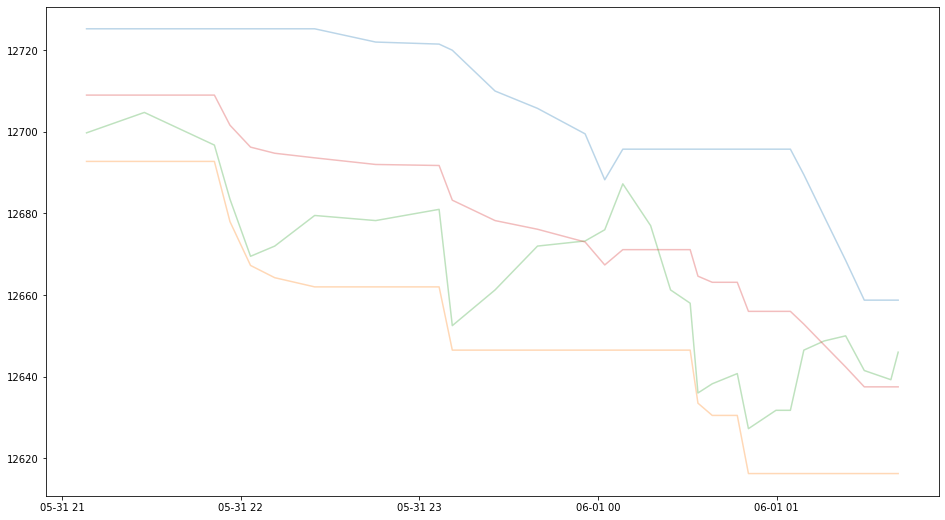

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(upperline[-30:], label='Nas', alpha=0.3)

plt.plot(lowerline[-30:], label='Nas', alpha=0.3)
plt.plot(t600["Close"][-30:].astype(float), label='Nas', alpha=0.3)
plt.plot(midline[-30:], label='Nas', alpha=0.3)




In [ ]:
#추세판별함수 
#당시의 틱이 상승내지 하락이며 이전에 두번의 상승 및 하락이 추가로 진행되어야 함.

def trendcon(upperline, lowerline):
    trendstates=0
    trconup=[]
    trcondn=[]
    #상승추세
    for i in range(10):    
        if upperline[-i]>upperline[-(i+1)]:
            trconup.append(1)

    for i in range(10):    
        if lowerline[-i]<lowerline[-(i+1)]:
            trcondn.append(1)

    sumup=sum(trconup)    
    print("상승추세 스텍 : ", sumup)
    sumdn=sum(trcondn)
    print("하락추세 스텍 : ", sumdn)

    if sumup>=3 :
        trendstates=1
    elif sumdn>=3 :
        trendstates=-1
    return trendstates




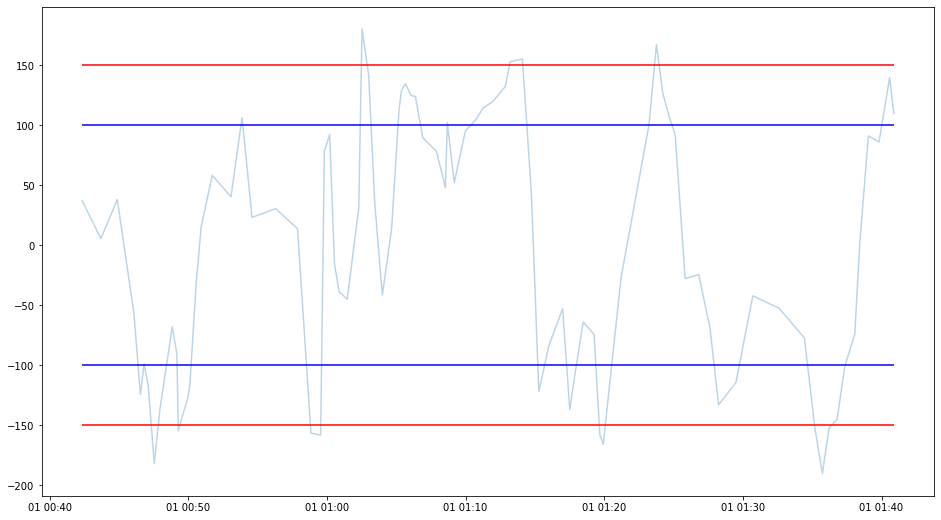

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(cci60[-90:], label='Nas', alpha=0.3)
plt.hlines(150, cci60[-90:].index[0] , cci600[-90:].index[-1] , color="red")
plt.hlines(100, cci60[-90:].index[0] , cci600[-90:].index[-1] , color="blue")
plt.hlines(-150, cci60[-90:].index[0] , cci600[-90:].index[-1] ,color="red")
plt.hlines(-100, cci60[-90:].index[0] , cci600[-90:].index[-1] ,color="blue")

In [ ]:
trendstetes=trendcon(upperline, lowerline)

상승추세 스텍 :  0
하락추세 스텍 :  1


In [ ]:
trendstetes

0

In [ ]:
#중심선 라인을 기준으로 위로 돌파 해 있는지 여부를 확인(매도 & 매수청산)

midcrossup=midline<t600["High"].astype(float)

#중심선 라인을 기준으로 아래로 빠져있는지의 여부를 확인(매수 & 매도청산)

midcrssdn=midline>t600["Low"].astype(float)

In [ ]:
print(midcrossup[-1])
print(midcrssdn[-1])

True
True


In [ ]:
#매도 및 매수청산
cciupover=cci600>=20
cciup_over=any(cciupover[-3:]==True)
#매수 및 매도청산
ccidnover=cci600<=-20
ccidn_over=any(ccidnover[-3:]==True)

In [ ]:
ccidnover[-3:]==True

Time
2022-06-01 01:29:30    False
2022-06-01 01:38:26    False
2022-06-01 01:40:53    False
Name: cci, dtype: bool

In [ ]:
print(cciup_over)
print(ccidn_over)

True
False


In [ ]:
#진입 조건 및 청산 조건 함수 (필요항목 : 밴드차트 중심선, 600틱, CCI, 20틱 상하단)

#매도 진입 및 매수진입청산 조건
def sellcon(midline, cci600, t600, t60, t60_1_upper):
    #중심선 라인을 기준으로 위로 돌파 해 있는지 여부를 확인(매도 & 매수청산)
    midcrossup=midline<t600["High"].astype(float)
    
    #매도 및 매수청산
    cciupover=cci600>=20
    cciup_over=any(cciupover[-3:]==True)

    #진입 매도 조건 1
    uplinehigh=t60["High"].astype(float)>t60_1_upper

    #진입 매도 조건 2
    upinclose=t30["Close"].astype(float)>t30_1_upper

    #진입 매도조건 3
    upoutclose=t30["Close"].astype(float)<t30_1_upper

    #조건 취합 
    sell_con=any(midcrossup[-2:]==True) and \
        cciup_over and uplinehigh[-3] and \
            upinclose[-3] and \
                upoutclose[-2]

    return sell_con


def buycon(midline, cci600, t600, t30, t30_1_lower):
    #중심선 라인을 기준으로 아래로 빠져있는지의 여부를 확인(매수 & 매도청산)
    midcrssdn=midline>t600["Low"].astype(float)
    
    #매수 및 매도청산
    ccidnover=cci600<=-20
    ccidn_over=any(ccidnover[-3:]==True)

    #진입 매수 조건 1
    dnlinelow=t30["Low"].astype(float)<t30_1_lower

    #진입 매수 조건 2
    dninclose=t30["Close"].astype(float)<t30_1_lower

    #진입 매수 조건 3
    dnoutclose=t30["Close"].astype(float)>t30_1_lower

    #조건 취합
    buy_con=any(midcrssdn[-2:]==True) and \
        ccidn_over and dnlinelow[-3] and \
            dninclose[-3] and \
                dnoutclose[-2]

    return buy_con

In [ ]:

cci60=ta.trend.cci(low=t60["Low"].astype(float), high=t60["High"].astype(float), close=t60["Close"].astype(float), window=9, constant=0.015).dropna(axis=False)

In [ ]:
#매수저항
#매도저항